<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Food_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset not found. Creating dummy food image dataset ✅
Dataset Ready ✅
Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Class Indices: {'burger': 0, 'fries': 1, 'pizza': 2}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 914ms/step - accuracy: 0.3331 - loss: 3.8792 - val_accuracy: 0.3333 - val_loss: 1.1113
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 709ms/step - accuracy: 0.3258 - loss: 1.1066 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.3112 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0994
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 713ms/step - accuracy: 0.4012 - loss: 1.1109 - val_accuracy: 0.3000 - val_loss: 1.0987
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 865ms/step - accuracy: 0.4181 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 722ms/step - accuracy: 0.3292 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 842ms/step - accuracy: 0.3383 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.3464 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epo

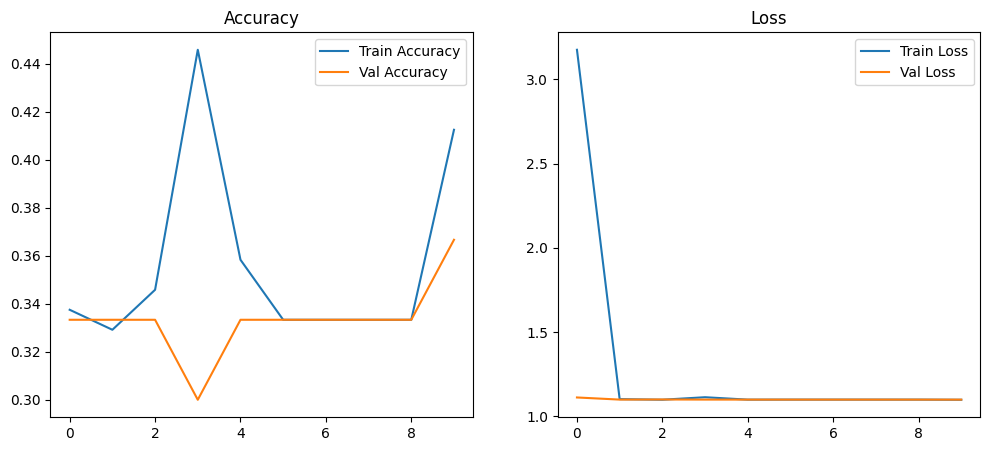

Model saved as food_image_classification_cnn.h5 ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction: Fries 🍽️
Confidence: 0.34


In [1]:
# ==========================================================
# Food Image Classification using CNN
# ==========================================================

# 1️⃣ Install required libraries (Colab safe)
# %%bash
# pip install -q tensorflow opencv-python matplotlib numpy

# ==========================================================
# 2️⃣ Imports
# ==========================================================
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ==========================================================
# 3️⃣ Dataset Loading / Auto Dummy Dataset Creation
# ==========================================================
DATASET_DIR = "food_dataset"
CLASSES = ["pizza", "burger", "fries"]

if not os.path.exists(DATASET_DIR):
    print("Dataset not found. Creating dummy food image dataset ✅")
    os.makedirs(DATASET_DIR)

    for cls in CLASSES:
        os.makedirs(os.path.join(DATASET_DIR, cls))

        for i in range(100):
            img = np.random.randint(0, 255, (128,128,3), dtype=np.uint8)
            cv2.imwrite(f"{DATASET_DIR}/{cls}/{cls}_{i}.jpg", img)

print("Dataset Ready ✅")

NUM_CLASSES = len(CLASSES)

# ==========================================================
# 4️⃣ Image Data Generator
# ==========================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Class Indices:", train_data.class_indices)

# ==========================================================
# 5️⃣ CNN Model Architecture
# ==========================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==========================================================
# 6️⃣ Train Model
# ==========================================================
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# ==========================================================
# 7️⃣ Model Evaluation
# ==========================================================
loss, acc = model.evaluate(val_data)
print(f"\nValidation Accuracy: {acc:.4f}")

# ==========================================================
# 8️⃣ Plot Accuracy & Loss
# ==========================================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

# ==========================================================
# 9️⃣ Save Model
# ==========================================================
model.save("food_image_classification_cnn.h5")
print("Model saved as food_image_classification_cnn.h5 ✅")

# ==========================================================
# 🔟 Predict Single Image
# ==========================================================
def predict_food(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128,128))
    img = img / 255.0
    img = np.reshape(img, (1,128,128,3))

    preds = model.predict(img)
    class_id = np.argmax(preds)
    confidence = preds[0][class_id]

    print(f"Prediction: {CLASSES[class_id].capitalize()} 🍽️")
    print(f"Confidence: {confidence:.2f}")

# Test using one training image
sample_image = os.path.join(DATASET_DIR, CLASSES[0], os.listdir(os.path.join(DATASET_DIR, CLASSES[0]))[0])
predict_food(sample_image)
